In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

#### First We focus on deliveries (CSV)

In [2]:
score_df=pd.read_csv('C:/Users/Madhu/Desktop/Kaggle/IPL/ipl/deliveries.csv')
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#### Top 10 wicket takers 

In [3]:
bowler_caught=score_df.groupby(['bowler'])['dismissal_kind'].agg(lambda a: (a=='caught').sum()).reset_index().sort_values(by='bowler',
                                                                                                                         ascending=True).reset_index(drop=True)

bowler_bowled=score_df.groupby(['bowler'])['dismissal_kind'].agg(lambda a: (a=='bowled').sum()).reset_index().sort_values(by='bowler',
                                                                                                                         ascending=True).reset_index(drop=True)

bowler_lbw=score_df.groupby(['bowler'])['dismissal_kind'].agg(lambda a: (a=='lbw').sum()).reset_index().sort_values(by='bowler',
                                                                                                                         ascending=True).reset_index(drop=True)

bowler_stumped=score_df.groupby(['bowler'])['dismissal_kind'].agg(lambda a: (a=='stumped').sum()).reset_index().sort_values(by='bowler',
                                                                                                                         ascending=True).reset_index(drop=True)

bowler_caught_and_bowled=score_df.groupby(['bowler'])['dismissal_kind'].agg(lambda a: (a=='caught and bowled').sum()).reset_index().sort_values(by='bowler',
                                                                                                                         ascending=True).reset_index(drop=True)

As we know a bowler gets a wicket if it is caught,bowled,lbw,stumped and c&b 

In [4]:
bowler_wickets=pd.DataFrame()

In [5]:
bowler_wickets['bowler']=bowler_caught['bowler']
bowler_wickets['caught']=bowler_caught['dismissal_kind']
bowler_wickets['bowled']=bowler_bowled['dismissal_kind']
bowler_wickets['lbw']=bowler_lbw['dismissal_kind']
bowler_wickets['c&b']=bowler_caught_and_bowled['dismissal_kind']
bowler_wickets['stumped']=bowler_stumped['dismissal_kind']
bowler_wickets['total_wickets']=bowler_wickets['caught']+bowler_wickets['bowled']+bowler_wickets['lbw']+bowler_wickets['c&b']+bowler_wickets['stumped']

In [6]:
bowler_wickets=bowler_wickets.sort_values(by='total_wickets',ascending=False)[:10]
bowler_wickets

,bowler,caught,bowled,lbw,c&b,stumped,total_wickets
276,SL Malinga,69,59,10,5,0,143
4,A Mishra,66,21,13,3,21,124
80,DJ Bravo,90,18,6,8,0,122
214,PP Chawla,56,33,14,4,13,120
109,Harbhajan Singh,61,25,8,10,14,118
229,R Vinay Kumar,78,13,6,4,0,101
219,R Ashwin,62,17,10,3,8,100
6,A Nehra,70,21,5,2,0,98
333,Z Khan,61,21,9,1,0,92
95,DW Steyn,58,25,6,2,0,91


Malinga seems to have taken the highest wickets in IPL

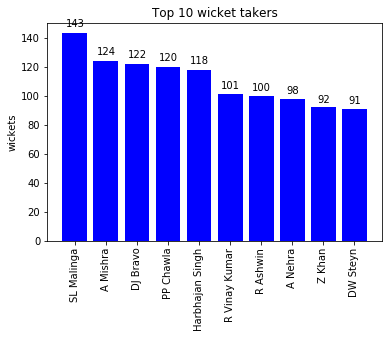

In [7]:
#plotting
labels=np.array(bowler_wickets['bowler'])
ind=np.arange(len(labels))
values=np.array(bowler_wickets['total_wickets'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='b')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 wicket takers")
ax.set_ylabel('wickets')
autolabel(rects)
plt.show()

#### Top 10 catchers

In [8]:
catchers=score_df.groupby(['fielder'])['dismissal_kind'].agg(lambda a: (a=='caught').sum()).reset_index().sort_values(by='fielder',
                                                                                                                         ascending=True).reset_index(drop=True)
catchers=catchers.sort_values(by='dismissal_kind',ascending=False)[:10]

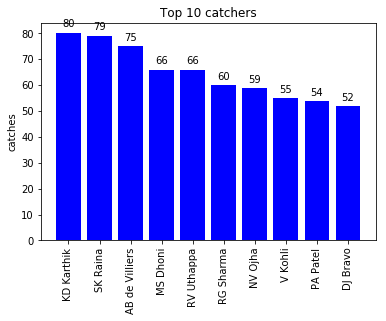

In [9]:
#plotting
labels=np.array(catchers['fielder'])
ind=np.arange(10)
values=np.array(catchers['dismissal_kind'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='b')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 catchers")
ax.set_ylabel('catches')
autolabel(rects)
plt.show()

It seems like wicket keepers get higher catches although Raina being in the 2nd place

#### Top 10 bowlers with more runs in IPL

In [10]:
bowler_runs=score_df.groupby(['bowler'])['total_runs'].agg(lambda a: (a>0).sum()).reset_index().sort_values(by='bowler',
                                                                                ascending=True).reset_index(drop=True)

bowler_runs=bowler_runs.sort_values(by='total_runs',ascending=False)[:10]
bowler_runs

,bowler,total_runs
109,Harbhajan Singh,1776
214,PP Chawla,1598
4,A Mishra,1591
203,P Kumar,1494
219,R Ashwin,1468
80,DJ Bravo,1441
276,SL Malinga,1437
229,R Vinay Kumar,1392
215,PP Ojha,1278
114,IK Pathan,1270


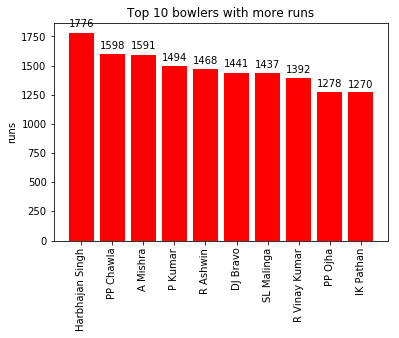

In [11]:
#plotting
labels=np.array(bowler_runs['bowler'])
ind=np.arange(len(labels))
values=np.array(bowler_runs['total_runs'])
fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='r')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 bowlers with more runs")
ax.set_ylabel('runs')
autolabel(rects)
plt.show()

Well, 8/10 are indian players and The spinners give a lot of runs it seems like 

#### Top 10 bowlers with Highest runs in an over

In [12]:
temp=score_df.groupby(['match_id','inning','over','bowler'])['total_runs'].agg('sum').reset_index().sort_values(by='total_runs',
                                                                                            ascending=False).reset_index(drop=True)
temp=temp[:10]
temp

,match_id,inning,over,bowler,total_runs
0,224,2,3,P Parameswaran,37
1,457,2,6,P Awana,33
2,149,1,13,RS Bopara,33
3,270,2,13,R Sharma,31
4,237,1,15,JJ van der Wath,30
5,561,1,19,S Kaushik,30
6,7,2,13,A Symonds,30
7,561,1,18,DJ Bravo,30
8,385,2,17,NLTC Perera,29
9,352,1,8,AJ Finch,29


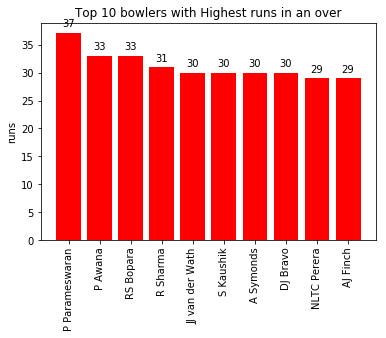

In [13]:
#plotting
labels=np.array(temp['bowler'])
ind=np.arange(len(labels))
values=np.array(temp['total_runs'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='r')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 bowlers with Highest runs in an over")
ax.set_ylabel('runs')
autolabel(rects)
plt.show()

I wish these were super overs

#### Top 10 batsmen with Highest runs in an innings

In [14]:
temp=score_df.groupby(['match_id','inning','batsman'])['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',
                                                                                            ascending=False).reset_index(drop=True)
temp=temp.drop_duplicates(subset='batsman', keep='first', inplace=False)[:10]
temp

,match_id,inning,batsman,batsman_runs
0,352,1,CH Gayle,175
1,1,1,BB McCullum,158
2,503,1,AB de Villiers,133
5,147,1,M Vijay,127
6,457,1,V Sehwag,122
7,184,2,PC Valthaty,120
10,9,1,A Symonds,117
11,2,1,MEK Hussey,116
12,458,1,WP Saha,115
13,38,1,SE Marsh,115


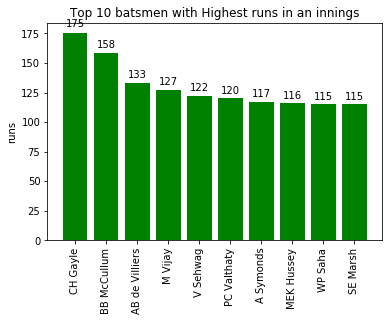

In [15]:
#plotting
labels=np.array(temp['batsman'])
ind=np.arange(len(labels))
values=np.array(temp['batsman_runs'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 batsmen with Highest runs in an innings")
ax.set_ylabel('runs')
autolabel(rects)
plt.show()

Gayle is super dangerous and the sky is the limit for him (that match was a nightmare to the oppsition team) followed by Mccullum and ABD

#### Top batsmen with 2 or more than 2 centuries

In [16]:
temp=score_df.groupby(['match_id','inning','batsman'])['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',
                                                                                            ascending=False).reset_index(drop=True)

temp['no_of_100s']=0
temp['no_of_100s'].loc[temp['batsman_runs']>=100]=1
temp=temp.groupby(['batsman'])['no_of_100s'].agg(lambda a:(a==1).sum()).reset_index().sort_values(by='no_of_100s',
                                                                                                 ascending=False).reset_index(drop=True)
temp=temp[:9]

C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


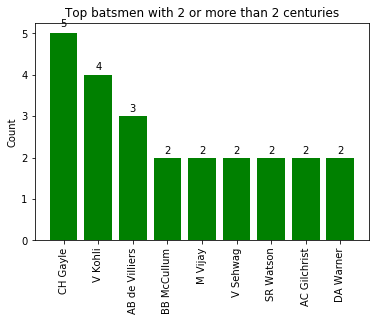

In [17]:
#plotting
labels=np.array(temp['batsman'])
ind=np.arange(len(labels))
values=np.array(temp['no_of_100s'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top batsmen with 2 or more than 2 centuries")
ax.set_ylabel('Count')
autolabel(rects)
plt.show()

No wonder if it is Gayle and Kohli is also great at innings

#### Top 10 run scorers in IPL

In [18]:

temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', 
                                                                                           ascending=False).reset_index(drop=True)

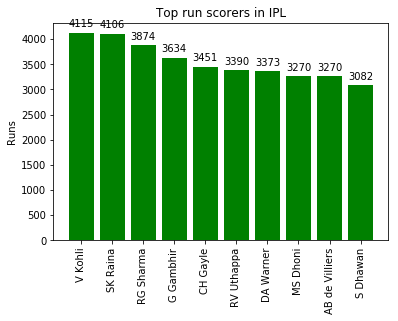

In [19]:
temp_df=temp_df[:10]
labels=np.array(temp_df['batsman'])
values=np.array(temp_df['batsman_runs'])
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticks(ind)
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Runs")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

It is good see young indian players scoring more runs than senior players 

#### Top 10 batsmen with highest no of 50's

In [20]:
temp=score_df.groupby(['match_id','inning','batsman'])['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',
                                                                                            ascending=False).reset_index(drop=True)

temp['no_of_50s']=0
temp['no_of_50s'].loc[temp['batsman_runs']>=50]=1
temp=temp.groupby(['batsman'])['no_of_50s'].agg(lambda a:(a==1).sum()).reset_index().sort_values(by='no_of_50s',
                                                                                                 ascending=False).reset_index(drop=True)
temp=temp[:10]
temp

C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,batsman,no_of_50s
0,DA Warner,34
1,G Gambhir,31
2,V Kohli,30
3,RG Sharma,30
4,SK Raina,29
5,CH Gayle,25
6,S Dhawan,25
7,AB de Villiers,24
8,AM Rahane,24
9,SE Marsh,19


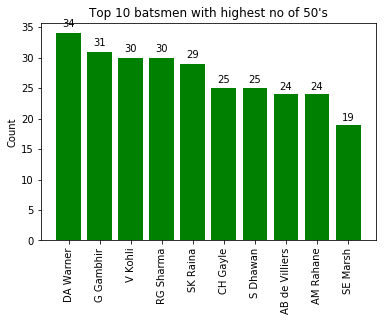

In [21]:
#plotting
labels=np.array(temp['batsman'])
ind=np.arange(len(labels))
values=np.array(temp['no_of_50s'])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 batsmen with highest no of 50's")
ax.set_ylabel('Count')
autolabel(rects)
plt.show()

#### Bowlers with more wides in IPL

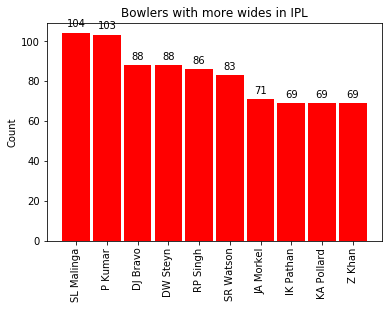

In [22]:
temp_df = score_df.groupby('bowler')['wide_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='wide_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['wide_runs']), width=width, color='r')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more wides in IPL")
autolabel(rects)
plt.show()

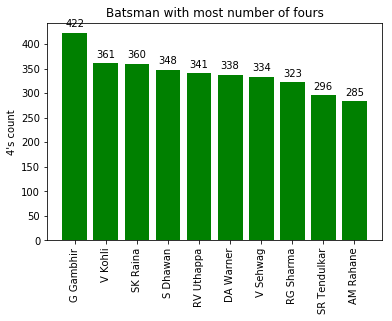

In [23]:
#top players for 4's
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda a: (a==4).sum()).reset_index().sort_values(by='batsman_runs', 
                                                                                           ascending=False).reset_index(drop=True)

temp_df=temp_df[:10]
labels=np.array(temp_df['batsman'])
values=np.array(temp_df['batsman_runs'])
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticks(ind)
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("4's count")
ax.set_title("Batsman with most number of fours")
autolabel(rects)
plt.show()

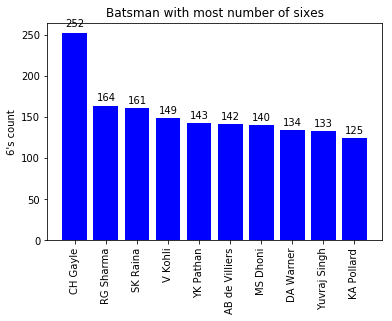

In [24]:
#top players for 6's
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda a: (a==6).sum()).reset_index().sort_values(by='batsman_runs', 
                                                                                           ascending=False).reset_index(drop=True)

temp_df=temp_df[:10]
labels=np.array(temp_df['batsman'])
values=np.array(temp_df['batsman_runs'])
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='b')
ax.set_xticks(ind)
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("6's count")
ax.set_title("Batsman with most number of sixes")
autolabel(rects)
plt.show()

#### how many balls faced by each batsman and how much scored

In [25]:
#how many balls faced by each batsman
balls_faced_df=score_df.groupby(['batsman'])['wide_runs'].agg(lambda a:(a==0).sum()).reset_index().sort_values(by='batsman', 
                                                                                        ascending=True).reset_index(drop=True)

noballs_faced_df=score_df.groupby(['batsman'])['noball_runs'].agg(lambda a:(a!=0).sum()).reset_index().sort_values(by='batsman', 
                                                                                        ascending=True).reset_index(drop=True)

batsman_df=score_df.groupby(['batsman'])['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman',
                                                                                        ascending=True).reset_index(drop=True)

balls_faced_df['total_balls_faced']=0
balls_faced_df['total_balls_faced'].loc[balls_faced_df['batsman']==noballs_faced_df['batsman']]=balls_faced_df['wide_runs']-noballs_faced_df['noball_runs']

del balls_faced_df['wide_runs']

balls_faced_df['batsman_runs']=batsman_df['batsman_runs']
balls_faced_df=balls_faced_df.sort_values(by='total_balls_faced',ascending=False)[:10]
balls_faced_df

C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,batsman,total_balls_faced,batsman_runs
409,V Kohli,3142,4115
354,SK Raina,2947,4106
305,RG Sharma,2930,3874
126,G Gambhir,2917,3634
322,RV Uthappa,2620,3390
327,S Dhawan,2538,3082
94,DA Warner,2360,3373
244,MS Dhoni,2343,3270
77,CH Gayle,2232,3451
165,JH Kallis,2213,2427


In [26]:
balls_faced_df['more_runs']=balls_faced_df['batsman_runs']-balls_faced_df['total_balls_faced']
balls_faced_df

,batsman,total_balls_faced,batsman_runs,more_runs
409,V Kohli,3142,4115,973
354,SK Raina,2947,4106,1159
305,RG Sharma,2930,3874,944
126,G Gambhir,2917,3634,717
322,RV Uthappa,2620,3390,770
327,S Dhawan,2538,3082,544
94,DA Warner,2360,3373,1013
244,MS Dhoni,2343,3270,927
77,CH Gayle,2232,3451,1219
165,JH Kallis,2213,2427,214


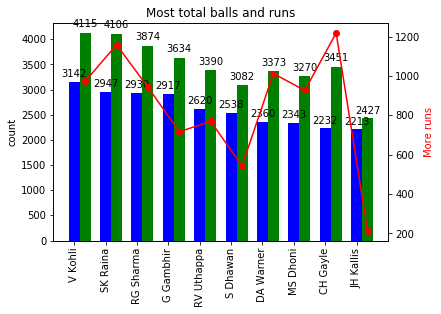

In [27]:
labels=balls_faced_df['batsman']
ind=np.arange(len(labels))
values=balls_faced_df['total_balls_faced']
values2=balls_faced_df['batsman_runs']

fig,ax=plt.subplots()
ax2 = ax.twinx()
rects=ax.bar(ind,values,width=0.35,color='b')
ax.set_xticks(ind)
ax.set_xticklabels(labels,rotation='vertical')
ax.set_title("Most total balls and runs")
ax.set_ylabel('count')

rects1=ax.bar(ind+0.35,values2,width=0.35,color='g')

autolabel(rects)
autolabel(rects1)

ax2.plot(ind+0.35, np.array(balls_faced_df['more_runs']), color='r', marker='o')
ax2.set_ylabel("More runs", color='r')
#ax2.set_ylim([0,100])
#ax2.grid(b=False)
plt.show()

Gayle seems to have high strike rate (faced 2232 balls and score 3451 runs) followed by Raina

#### Bowlers with more extras in IPL

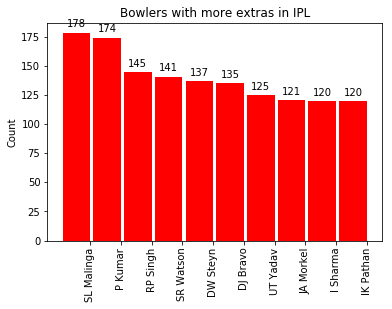

In [28]:
temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
autolabel(rects)
plt.show()

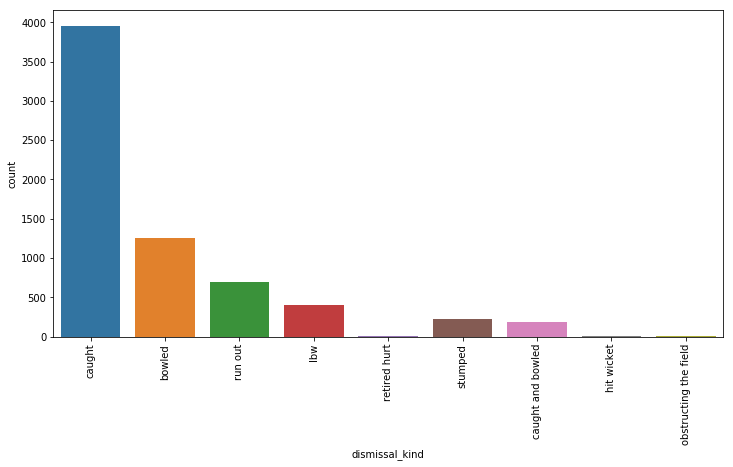

In [29]:
plt.figure(figsize=(12,6))
sn.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

Okay Lets get into matches(CSV)

In [30]:
match_df=pd.read_csv('C:/Users/Madhu/Desktop/Kaggle/IPL/ipl/matches.csv')
match_df[:2]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [31]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))
print('number of cities : ',len(match_df["city"].unique()))

Number of matches played so far :  577
Number of seasons :  9
number of cities :  31


#### Number of matches each season:

In [32]:
matches_count=match_df.groupby(['season'])
matches_count_season=matches_count['id'].count()
matches_count_season.sort_values(ascending=False)
# or match_df['season'].value_counts()

season
2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2015    59
2008    58
2009    57
Name: id, dtype: int64

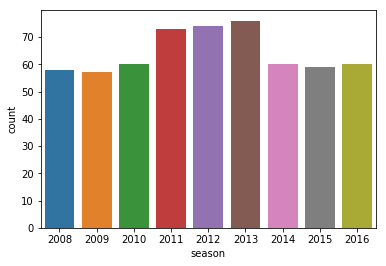

In [33]:
#no of macthes in each season
sn.countplot(x='season',data=match_df)
plt.show()

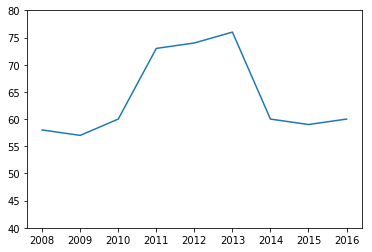

In [34]:
plt.plot(matches_count_season)
plt.ylim(40,80)
plt.show()

#### Number of matches in each venue:

In [35]:
match_count=match_df.groupby(['venue'])
match_count_venue=match_count['id'].count()
match_count_venue.sort_values(ascending=False)
#or match_df['venue'].value_counts()

venue
M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium                             

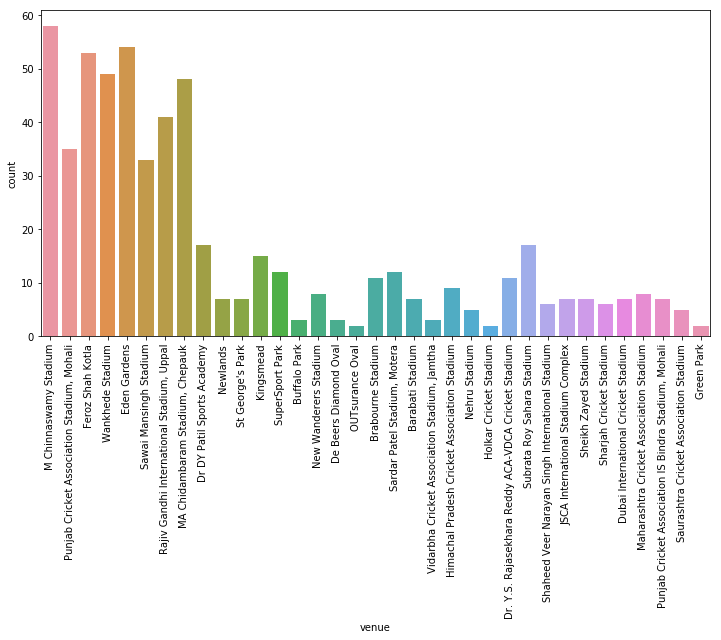

In [36]:
plt.figure(figsize=(12,6))
sn.countplot(x='venue', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

#### Number of matches played by each team

In [37]:
melt_df = pd.melt(match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
melt_df

,id,season,variable,value
0,1,2008,team1,Kolkata Knight Riders
1,2,2008,team1,Chennai Super Kings
2,3,2008,team1,Rajasthan Royals
3,4,2008,team1,Mumbai Indians
4,5,2008,team1,Deccan Chargers
5,6,2008,team1,Kings XI Punjab
6,7,2008,team1,Deccan Chargers
7,8,2008,team1,Chennai Super Kings
8,9,2008,team1,Deccan Chargers
9,10,2008,team1,Kings XI Punjab


In [38]:
t=melt_df.groupby(['value'])
t=t['id'].count()
t.sort_values(ascending=False)

value
Mumbai Indians                 140
Royal Challengers Bangalore    139
Kings XI Punjab                134
Delhi Daredevils               133
Kolkata Knight Riders          132
Chennai Super Kings            131
Rajasthan Royals               118
Deccan Chargers                 75
Sunrisers Hyderabad             62
Pune Warriors                   46
Gujarat Lions                   16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
Name: id, dtype: int64

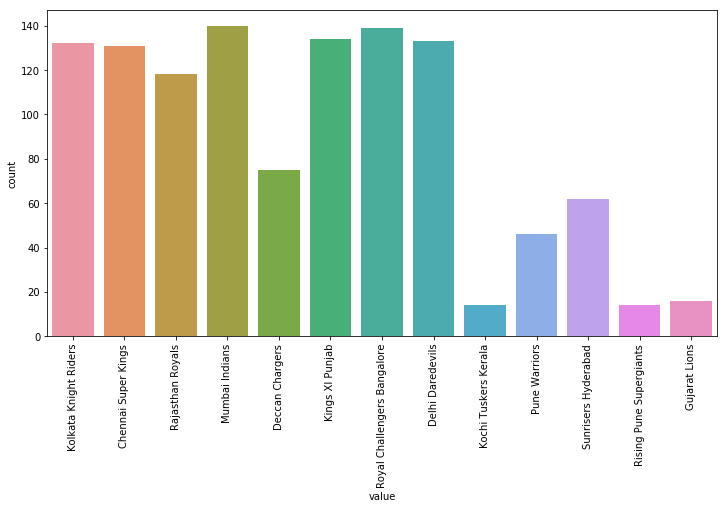

In [39]:
plt.figure(figsize=(12,6))
sn.countplot(x='value', data=melt_df)
plt.xticks(rotation='vertical')
plt.show()

#### Number of wins per team:

In [40]:
win_count=match_df.groupby(['winner'])
win_count_teams=win_count['id'].count()
win_count_teams.sort_values(ascending=False)
#or match_df['winner'].value_counts()

winner
Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: id, dtype: int64

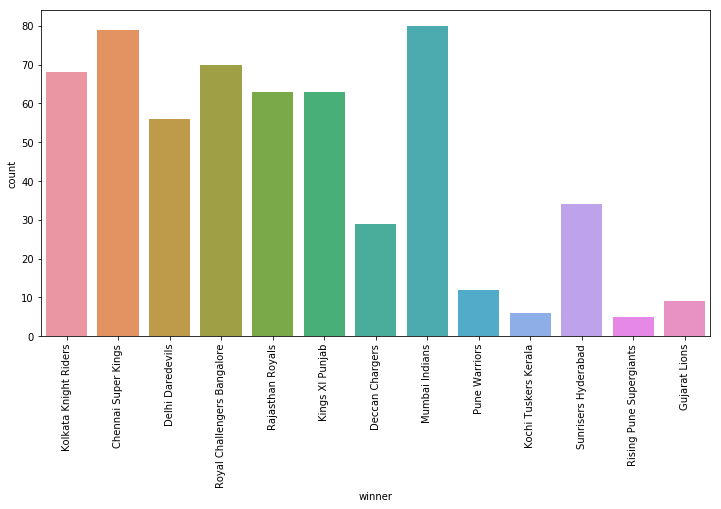

In [41]:
plt.figure(figsize=(12,6))
sn.countplot(x='winner',data=match_df)
plt.xticks(rotation='vertical')
plt.show()

#### Win Percentage for each team (wins/total)

In [42]:
melt_df = pd.melt(match_df, id_vars=['id','season','winner'], value_vars=['team1', 'team2'])
melt_df

,id,season,winner,variable,value
0,1,2008,Kolkata Knight Riders,team1,Kolkata Knight Riders
1,2,2008,Chennai Super Kings,team1,Chennai Super Kings
2,3,2008,Delhi Daredevils,team1,Rajasthan Royals
3,4,2008,Royal Challengers Bangalore,team1,Mumbai Indians
4,5,2008,Kolkata Knight Riders,team1,Deccan Chargers
5,6,2008,Rajasthan Royals,team1,Kings XI Punjab
6,7,2008,Delhi Daredevils,team1,Deccan Chargers
7,8,2008,Chennai Super Kings,team1,Chennai Super Kings
8,9,2008,Rajasthan Royals,team1,Deccan Chargers
9,10,2008,Kings XI Punjab,team1,Kings XI Punjab


In [43]:
t=melt_df.groupby(['winner'])
t=(t['id'].count()/2)
t.sort_values(ascending=False)

winner
Mumbai Indians                 80.0
Chennai Super Kings            79.0
Royal Challengers Bangalore    70.0
Kolkata Knight Riders          68.0
Rajasthan Royals               63.0
Kings XI Punjab                63.0
Delhi Daredevils               56.0
Sunrisers Hyderabad            34.0
Deccan Chargers                29.0
Pune Warriors                  12.0
Gujarat Lions                   9.0
Kochi Tuskers Kerala            6.0
Rising Pune Supergiants         5.0
Name: id, dtype: float64

In [44]:
t=melt_df.groupby(['winner'])
t1=melt_df.groupby(['value'])
t=(t['id'].count()/2)/(t1['id'].count())*100

In [45]:
t.sort_values(ascending=False)

winner
Chennai Super Kings            60.305344
Mumbai Indians                 57.142857
Gujarat Lions                  56.250000
Sunrisers Hyderabad            54.838710
Rajasthan Royals               53.389831
Kolkata Knight Riders          51.515152
Royal Challengers Bangalore    50.359712
Kings XI Punjab                47.014925
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.105263
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
Name: id, dtype: float64

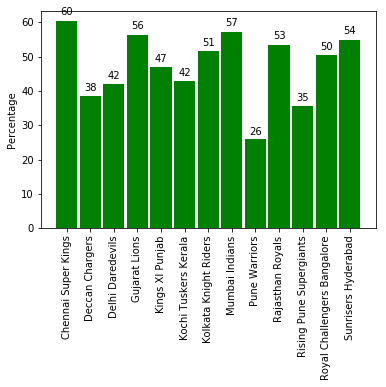

In [46]:
labels=(np.array(t.keys()))
win_pers=(np.array(t))
ind = np.arange(len(labels))

fig,ax=plt.subplots()
rects = ax.bar(ind,win_pers,width=0.9, color='g')
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Percentage")
ax.set_xticks(ind)
autolabel(rects)
plt.show()

#### Toss decision:
Let us see the toss decisions taken so far.

In [47]:
toss_count=match_df.groupby(['toss_decision'])
toss_count=toss_count['id'].count()
toss_count

toss_decision
bat      262
field    315
Name: id, dtype: int64

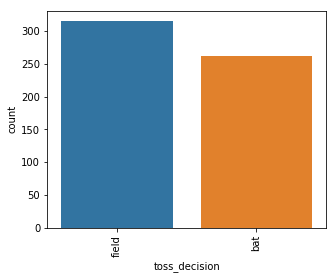

In [48]:
plt.figure(figsize=(5,4))
sn.countplot(x='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ts=match_df.toss_decision.value_counts()
ts

field    315
bat      262
Name: toss_decision, dtype: int64

In [50]:
ts.index

Index(['field', 'bat'], dtype='object')

In [51]:
labels=(np.array(ts.index))
labels

array(['field', 'bat'], dtype=object)

In [52]:
sizes=np.array(((ts/ts.sum())*100))
sizes

array([ 54.59272097,  45.40727903])

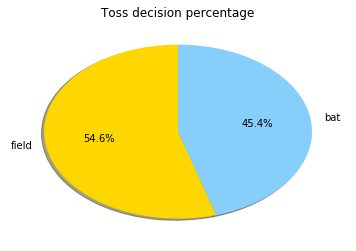

In [53]:
colors = ['gold', 'lightskyblue']
plt.pie(sizes,labels=labels,colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

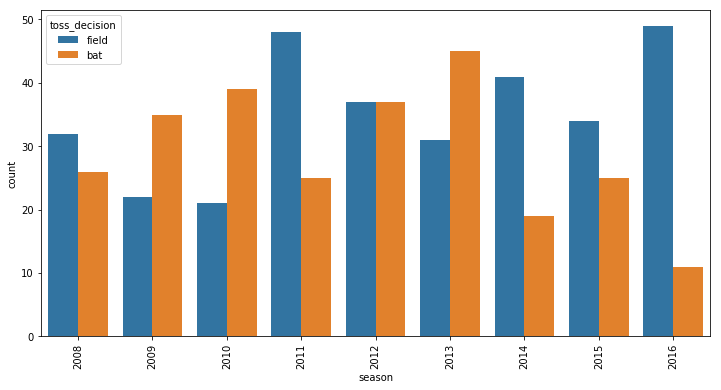

In [54]:
plt.figure(figsize=(12,6))
sn.countplot(x='season', hue='toss_decision', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

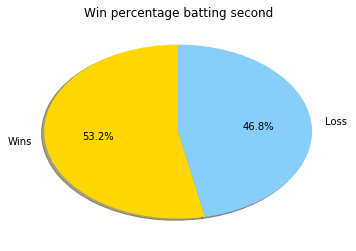

In [55]:
#wins over batting second or filed first
num_of_wins = (match_df.win_by_wickets>0).sum()
num_of_loss = (match_df.win_by_wickets==0).sum()

labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]

colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

#### Top players of the match:

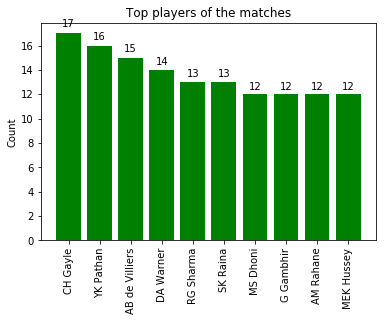

In [56]:
tp=match_df['player_of_match'].value_counts()[:10]
labels=np.array(tp.keys())
values=np.array(tp)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top players of the matches")
autolabel(rects)
plt.show()

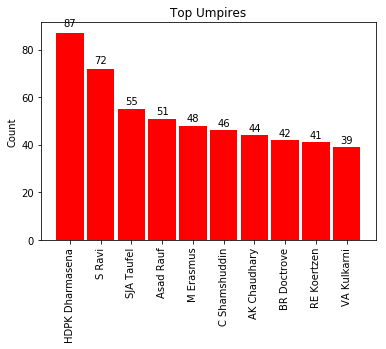

In [57]:
#top empires
temp_df = pd.melt(match_df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='r')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

#### Percentage of toss winner of match winner

C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


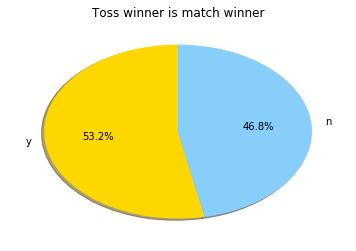

In [58]:
match_df['toss_winner_is_winner']='n'
match_df['toss_winner_is_winner'].loc[match_df['toss_winner']==match_df['winner']]='y'
temp=match_df['toss_winner_is_winner'].value_counts()
labels=np.array(temp.index)
values=np.array((temp/temp.sum())*100)
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

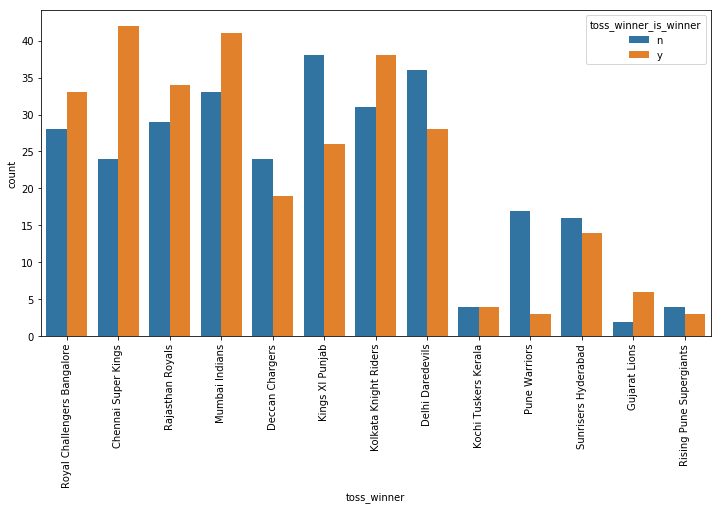

In [59]:
plt.figure(figsize=(12,6))
sn.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

#### each team winining type

In [60]:
match_df['win_by']="tie"
match_df['win_by'].loc[match_df['win_by_runs']>0]='runs'
match_df['win_by'].loc[match_df['win_by_wickets']>0]='wickets'

C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


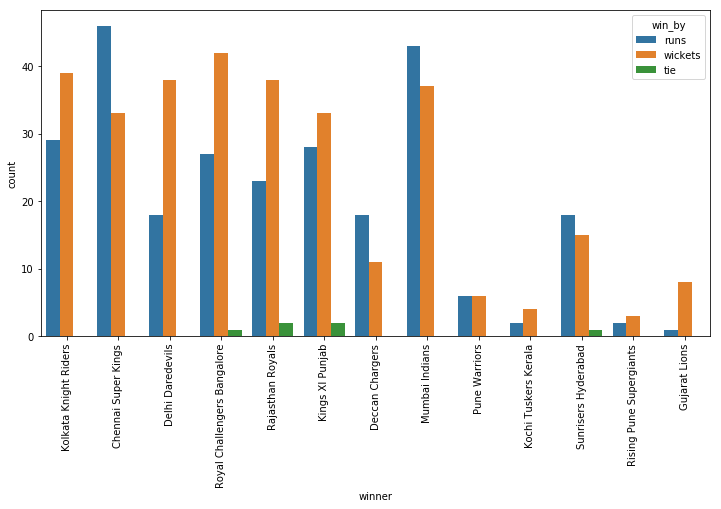

In [61]:
plt.figure(figsize=(12,6))
sn.countplot(x='winner', hue='win_by', data=match_df)
plt.xticks(rotation='vertical')
plt.show()